## Import Packages

In [47]:
!pip install econml
!pip install pdflatex

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as st

from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from econml.grf import CausalForest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


Mounted at /content/gdrive


## Import Functions

In [49]:
dir = '/content/gdrive/My Drive/plots'
!wget https://raw.githubusercontent.com/A-ngelG/CE888/main/project/Other_functions.py -O 'functions.py'
!wget https://raw.githubusercontent.com/A-ngelG/CE888/main/project/metrics.py -O 'metrics.py'

--2022-04-28 07:46:42--  https://raw.githubusercontent.com/A-ngelG/CE888/main/project/Other_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437 [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]     437  --.-KB/s    in 0s      

2022-04-28 07:46:43 (12.0 MB/s) - ‘functions.py’ saved [437/437]

--2022-04-28 07:46:43--  https://raw.githubusercontent.com/A-ngelG/CE888/main/project/metrics.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2309 (2.3K) [text/plain]
Saving to: ‘metrics.py

In [50]:
import functions as f
import metrics as m

## Jobs
t for treatment

y for factuals

x for background

e whether data was observational or experimental


### Data

#### Load the data

In [51]:
jobs = pd.read_csv('https://raw.githubusercontent.com/A-ngelG/CE888/main/project/data/jobs.csv')

##### Visualize data tables
This helps to give insight on the variables in each column and whether they are continuos or binary.

In [52]:
print('jobs')
jobs

jobs


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,1.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0.0,0.0,0.0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0.0,1.0,0.0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0.0,1.0,0.0
3210,0.702982,0.101835,0.0,0.0,1.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0.0,1.0,0.0


In [53]:
print(jobs.info()) #printed to check if there is by chance some missing data
print(jobs.shape) #used to check the size of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB
None
(3212, 20)


In [54]:
jobs.describe() #helps to see ranges of each of the columns, and gives insight on the outcomes and individual treatment effect.

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.382901e-16,-3.820971e-16,0.374222,0.048879,0.707970,0.411893,-1.200783e-16,4.956600e-17,-6.083414e-18,1.757408e-14,-2.638422e-16,-1.168292e-17,9.429291e-17,0.168742,0.167497,1.901758e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [55]:
print(jobs['y'].value_counts())#to check how imbalanced the treatment column is
print(jobs['e'].value_counts())#to check how imbalanced the treatment column is

1.0    2730
0.0     482
Name: y, dtype: int64
0.0    2490
1.0     722
Name: e, dtype: int64


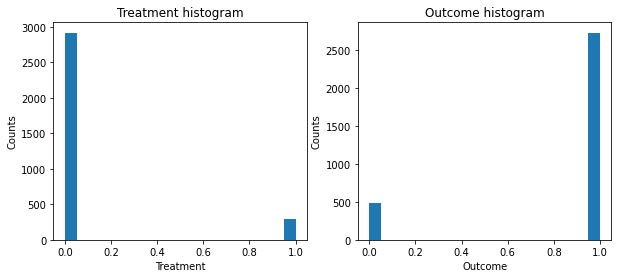

In [56]:
bins=20
fig,axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(jobs['t'], bins=bins)
axs[1].hist(jobs['y'], bins=bins)
axs[0].set_xlabel('Treatment')
axs[0].set_ylabel('Counts')
axs[0].set_title("Treatment histogram")
axs[1].set_xlabel('Outcome')
axs[1].set_ylabel('Counts')
axs[1].set_title("Outcome histogram")
fig2 = plt.gcf()
fig2.savefig(f'{dir}subplot.pdf')
plt.show()
#Grafical means for checking whether the data is skewed/imbalanced

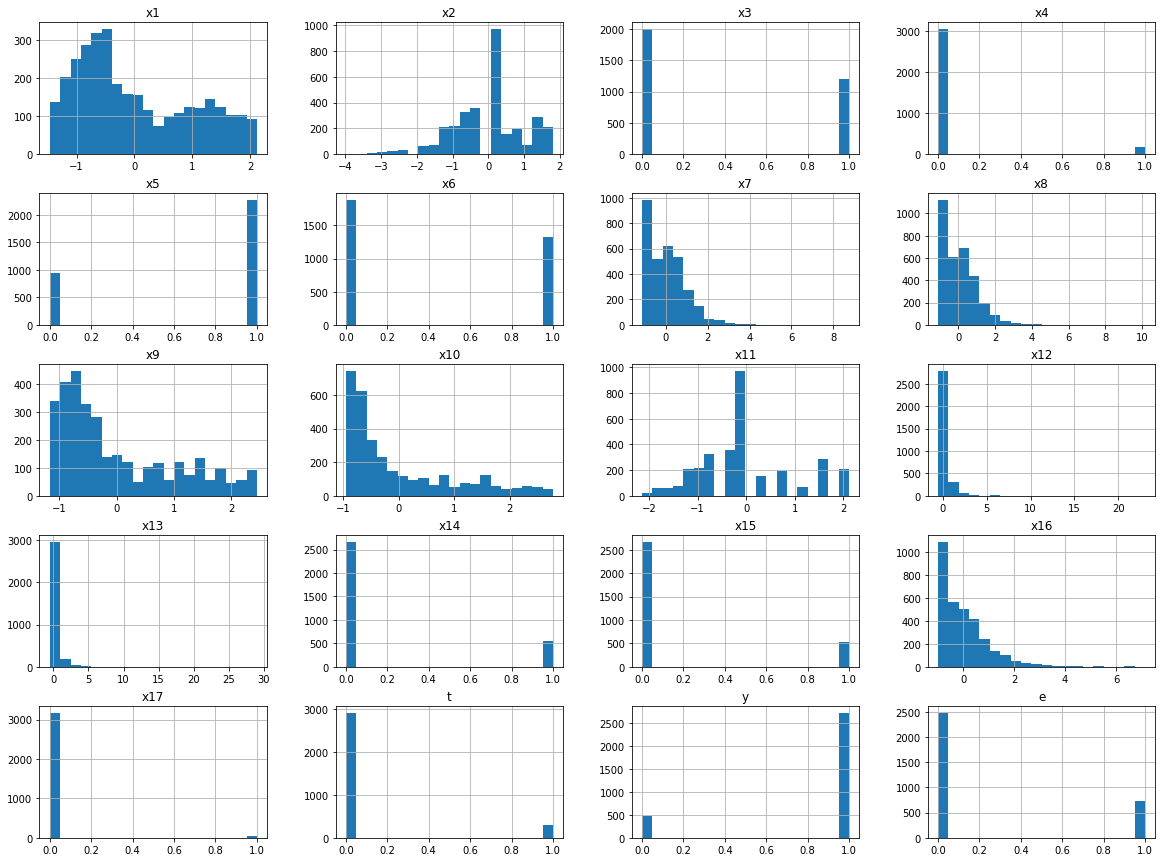

In [57]:
_ = jobs.hist(bins=20, figsize=(20,15))  #basic data visualization, looking for skewed data, and other outliners

#### Preprocessing
Data split for training and validation, then preprocessed with standardscaler.


In [58]:
x = np.array(jobs)
x = x[:,0:17]
t = jobs['t']
y = jobs['y']
e = jobs['e']

x_train, x_test, t_train, t_test, y_train, y_test, e_train, e_test = train_test_split(x, t, y, e, test_size=0.2)
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)
t_train=t_train[:,np.newaxis]  #reshaping
tt_test = t_test
#t_test=t_test[:,np.newaxis]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


### Training


#### Non optimised

##### Random Forest Classifier


In [59]:
rf = RandomForestClassifier()
#Train on training data
xt_train = np.concatenate((x_train,t_train),axis = 1) 
rf.fit(xt_train, y_train)

#Test predictions
#Predict y0 given [X,0]
rf_y0_test = rf.predict(np.concatenate((x_test,np.zeros((len(x_test),1))),axis=1))
#Predict y1 given [X,1]
rf_y1_test = rf.predict(np.concatenate((x_test,np.ones((len(x_test),1))),axis=1))

#Calculate ITEs
rf_ite_test = rf_y1_test - rf_y0_test

##### RF_IPSW


In [60]:
#Get Sample weights
w_clf = RandomForestClassifier()
weights = f.get_ps_weights(w_clf,x_train,t_train)
#Train regressor
rf_ipsw = RandomForestClassifier()
xt_train = np.concatenate((x_train,t_train),axis = 1) 
rf_ipsw.fit(xt_train, y_train, sample_weight=weights)

#Test predictions
#Predict y0 given [X,0]
rf_ipsw_y0_test = rf_ipsw.predict(np.concatenate((x_test,np.zeros((len(x_test),1))),axis=1))
#Predict y1 given [X,1]
rf_ipsw_y1_test = rf_ipsw.predict(np.concatenate((x_test,np.ones((len(x_test),1))),axis=1))

#Calculate ITEs
rf_ipsw_ite_test = rf_ipsw_y1_test - rf_ipsw_y0_test

##### Causal Forest


In [61]:
cf = CausalForest()
cf.fit(x_train,t_train,y_train)

cf_ite_test = cf.predict(x_test)

#### Hyperparameter optimisation


##### Random Forest with GridSearchCV

In [62]:
#Create parameters for Random Forest Classifier
params_tree = {"max_leaf_nodes": [10, 20, 30, None], "max_depth": [5, 10, 20, None]}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=params_tree,n_jobs=-1, cv=5)
rf_gs.fit(np.concatenate([x_train, t_train], axis=1), y_train)

#Test predictions
#Predict y0 given [X,0]
rf_gs_y0_test = rf.predict(np.concatenate((x_test,np.zeros((len(x_test),1))),axis=1))
#Predict y1 given [X,1]
rf_gs_y1_test = rf.predict(np.concatenate((x_test,np.ones((len(x_test),1))),axis=1))

#Calculate ITEs
rf_gs_ite_test = rf_gs_y1_test - rf_gs_y0_test 

##### RF (IPW) with GridSearchCV

In [63]:
#GridSearch for RFC
w_clf_gs = GridSearchCV(RandomForestClassifier(),param_grid =params_tree,n_jobs=-1,cv=5)
weights_gs = f.get_ps_weights(w_clf_gs,x_train,t_train)
#GridSearch for RFC 
rf_ipsw_gs = GridSearchCV(RandomForestClassifier(),param_grid=params_tree,n_jobs=-1,cv=5)
rf_ipsw_gs.fit(np.concatenate([x_train,t_train],axis=1), y_train, sample_weight = weights_gs)

#Test predictions
#Predict y0 given [X,0]
rf_ipsw_gs_y0_test = rf_ipsw_gs.predict(np.concatenate((x_test,np.zeros((len(x_test),1))),axis=1))
#Predict y1 given [X,1]
rf_ipsw_gs_y1_test = rf_ipsw_gs.predict(np.concatenate((x_test,np.ones((len(x_test),1))),axis=1))

#Calculate ITEs
rf_ipsw_gs_ite_test = rf_ipsw_gs_y1_test - rf_ipsw_gs_y0_test
rf_ipsw_gs.best_params_

{'max_depth': 20, 'max_leaf_nodes': 30}

### Evaluation

In [64]:
rf_att_test = m.abs_att(rf_ite_test,y_test,t_test,e_test)
rf_pl_test = m.policy_risk(rf_ite_test,y_test,t_test,e_test)

rf_gs_att_test = m.abs_att(rf_gs_ite_test,y_test,t_test,e_test)
rf_gs_pl_test = m.policy_risk(rf_gs_ite_test,y_test,t_test,e_test)

rf_ipsw_att_test = m.abs_att(rf_ipsw_ite_test,y_test,t_test,e_test)
rf_ipsw_pl_test = m.policy_risk(rf_ipsw_ite_test,y_test,t_test,e_test)

rf_ipsw_gs_att_test = m.abs_att(rf_ipsw_gs_ite_test,y_test,t_test,e_test)
rf_ipsw_gs_pl_test = m.policy_risk(rf_ipsw_gs_ite_test,y_test,t_test,e_test)

cf_att_test = m.abs_att(cf_ite_test,y_test,t_test,e_test)
cf_pl_test = m.policy_risk(np.squeeze(cf_ite_test),y_test,t_test,e_test)

In [65]:
results = []

results.append(['RF', rf_att_test,rf_pl_test])
results.append(['RF GS', rf_gs_att_test,rf_gs_pl_test])
results.append(['RF (IPW)', rf_ipsw_att_test,rf_ipsw_pl_test])
results.append(['RF (IPW) GS', rf_ipsw_gs_att_test,rf_ipsw_gs_pl_test])
results.append(['CF (RF)', cf_att_test,cf_pl_test])
#results.append(['CF GS', tl_gs_ate_test,tl_gs_pehe_test])


cols = ['Method','ATT test', 'Policy Risk']
df = pd.DataFrame(results,columns=cols)
df

,Method,ATT test,Policy Risk
0,RF,0.046802,0.267170
1,RF GS,0.046802,0.267170
2,RF (IPW),0.009066,0.276589
3,RF (IPW) GS,0.009802,0.308502
4,CF (RF),0.019135,0.257185


In [66]:
rf_att_bounds = f.mean_ci(rf_ite_test)
rf_gs_att_bounds = f.mean_ci(rf_gs_ite_test)
rf_ipsw_att_bounds = f.mean_ci(rf_ipsw_ite_test)
rf_ipsw_gs_att_bounds = f.mean_ci(rf_ipsw_gs_ite_test)
cf_att_bounds = f.mean_ci(cf_ite_test)

results = []
results.append(['RF', rf_att_bounds[0], rf_att_bounds[1], rf_att_bounds[2]])
results.append(['RF GS', rf_gs_att_bounds[0], rf_gs_att_bounds[1], rf_gs_att_bounds[2]])
results.append(['RF (IPW)', rf_ipsw_att_bounds[0], rf_ipsw_att_bounds[1], rf_ipsw_att_bounds[2]])
results.append(['RF (IPW) GS', rf_ipsw_gs_att_bounds[0], rf_ipsw_gs_att_bounds[1], rf_ipsw_gs_att_bounds[2]])
results.append(['CF (RF))', cf_att_bounds[0], cf_att_bounds[1], cf_att_bounds[2]])

cols = ['Method', 'ATT mean', 'CI lower', 'CI upper']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATT mean,CI lower,CI upper
0,RF,0.045101,0.024442,0.06576
1,RF GS,0.045101,0.024442,0.06576
2,RF (IPW),0.038880,0.018601,0.05916
3,RF (IPW) GS,0.037325,0.021413,0.053237
4,CF (RF)),-0.020375,[-0.033524493861223616],[-0.007226113062183917]
